Tokenze Text 

In [169]:
# Import Required Libariries
import pandas as pd
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [170]:
url = 'https://raw.githubusercontent.com/WhyseRabbit/med-cabinet-ds/feature/tensor_effects/data/cannabis.csv'
df = pd.read_csv(url)
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [171]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', str(text))
    tokens = tokens.lower().split()
    
    return tokens

In [172]:
# Notice anything odd here? 
df['Type'].value_counts()

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

In [173]:
# Count the raw text
df['Description'].value_counts(normalize=True)[:50]

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        0.001726
Grape Crush (or Grapekrush) is an indica-heavy hybrid strain with just enough sativ

In [174]:
df['base_tokens'] = df['Description'].apply(tokenize)
df['base_tokens'].head()

0    [100, og, is, a, 5050, hybrid, strain, that, p...
1    [the, 98, aloha, white, widow, is, an, especia...
2    [1024, is, a, sativadominant, hybrid, bred, in...
3    [13, dawgs, is, a, hybrid, of, g13, and, chemd...
4    [also, known, as, kosher, tangie, 24k, gold, i...
Name: base_tokens, dtype: object

In [175]:
df[['Description', 'base_tokens']][:10]

,Description,base_tokens
0,$100 OG is a 50/50 hybrid strain that packs a ...,"[100, og, is, a, 5050, hybrid, strain, that, p..."
1,The ‘98 Aloha White Widow is an especially pot...,"[the, 98, aloha, white, widow, is, an, especia..."
2,1024 is a sativa-dominant hybrid bred in Spain...,"[1024, is, a, sativadominant, hybrid, bred, in..."
3,13 Dawgs is a hybrid of G13 and Chemdawg genet...,"[13, dawgs, is, a, hybrid, of, g13, and, chemd..."
4,"Also known as Kosher Tangie, 24k Gold is a 60%...","[also, known, as, kosher, tangie, 24k, gold, i..."
5,3 Bears OG by Mephisto Genetics is an autoflow...,"[3, bears, og, by, mephisto, genetics, is, an,..."
6,"The 3 Kings marijuana strain, a holy trinity o...","[the, 3, kings, marijuana, strain, a, holy, tr..."
7,The indica-dominant 303 OG is a Colorado strai...,"[the, indicadominant, 303, og, is, a, colorado..."
8,3D CBD from Snoop Dogg’s branded line of canna...,"[3d, cbd, from, snoop, doggs, branded, line, o..."
9,"Also known as Optimus Prime, the indica-domina...","[also, known, as, optimus, prime, the, indicad..."


In [176]:
df['base_tokens'] = df['Description'].astype(str)
df['base_tokens'].head()

0    $100 OG is a 50/50 hybrid strain that packs a ...
1    The ‘98 Aloha White Widow is an especially pot...
2    1024 is a sativa-dominant hybrid bred in Spain...
3    13 Dawgs is a hybrid of G13 and Chemdawg genet...
4    Also known as Kosher Tangie, 24k Gold is a 60%...
Name: base_tokens, dtype: object

In [177]:
df['Type'].value_counts()

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

In [178]:
#df = df[df['Type'] == 'hybrid'].copy()
#df.head(3)

Analyzing Tokens

In [179]:
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['base_tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[(' ', 168593),
 ('e', 92978),
 ('a', 74727),
 ('i', 68020),
 ('t', 67621),
 ('s', 61201),
 ('n', 61162),
 ('o', 53109),
 ('r', 52618),
 ('h', 34672)]

In [180]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [181]:
# Use the Function
wc = count(df['base_tokens'])
print(wc.shape)
wc.head()

(96, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,,2314,168593,1.0,0.160040,0.160040,0.984262
29,e,2317,92978,2.0,0.088261,0.248300,0.985538
22,a,2347,74727,3.0,0.070936,0.319236,0.998299
5,i,2314,68020,4.0,0.064569,0.383805,0.984262
3,t,2314,67621,5.0,0.064190,0.447995,0.984262


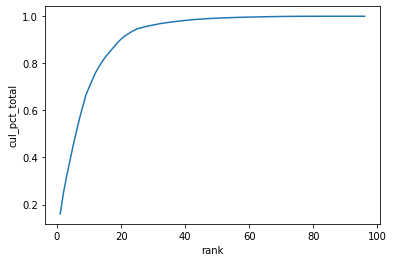

In [182]:
# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [183]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

1.0

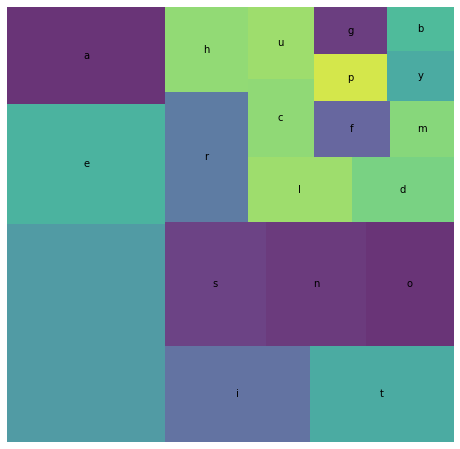

In [184]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Processing Raw Text with Spacy

In [185]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [186]:
df['Description'].astype(str)

0       $100 OG is a 50/50 hybrid strain that packs a ...
1       The ‘98 Aloha White Widow is an especially pot...
2       1024 is a sativa-dominant hybrid bred in Spain...
3       13 Dawgs is a hybrid of G13 and Chemdawg genet...
4       Also known as Kosher Tangie, 24k Gold is a 60%...
                              ...                        
2346    Zeus OG is a hybrid cross between Pineapple OG...
2347    Zkittlez is an indica-dominant mix of Grape Ap...
2348    Zombie Kush by Ripper Seeds comes from two dif...
2349    If you’re looking to transform into a flesh-ea...
2350    Zoom Pie (also known as Zombie Pie) is a heavy...
Name: Description, Length: 2351, dtype: object

In [187]:
# Make them tokens using the Tokenizer Pipe
tokens = []
for doc in tokenizer.pipe(df['base_tokens'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    #tokens += str(doc)

df['spaCy_tokens'] = tokens
df['spaCy_tokens'].head()

0    [$100, OG, is, a, 50/50, hybrid, strain, that,...
1    [The, ‘98, Aloha, White, Widow, is, an, especi...
2    [1024, is, a, sativa-dominant, hybrid, bred, i...
3    [13, Dawgs, is, a, hybrid, of, G13, and, Chemd...
4    [Also, known, as, Kosher, Tangie,, 24k, Gold, ...
Name: spaCy_tokens, dtype: object

In [188]:
wc = count(df['spaCy_tokens'])
print(wc.shape)
wc.head()

(15475, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
43,and,2231,7323,1.0,0.042067,0.042067,0.948958
36,a,2188,6121,2.0,0.035162,0.077229,0.930668
28,the,1898,4822,3.0,0.027700,0.104929,0.807316
57,of,1968,4566,4.0,0.026229,0.131159,0.837091
19,is,2132,3849,5.0,0.022111,0.153269,0.906848


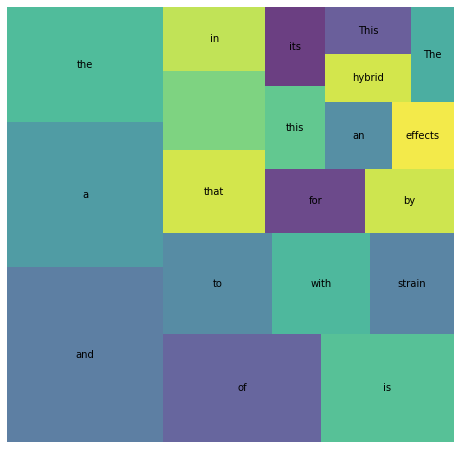

In [189]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Default Stop Words
Let's take a look at the standard stop words that came with our Spacy model:

In [190]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [191]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(df['base_tokens'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['spaCy_tokens_v2'] = tokens
df['spaCy_tokens_v2'].head()

0    [$100, og, 50/50, hybrid, strain, packs, stron...
1    [‘98, aloha, white, widow, especially, potent,...
2    [1024, sativa-dominant, hybrid, bred, spain, m...
3    [13, dawgs, hybrid, g13, chemdawg, genetics, b...
4    [known, kosher, tangie,, 24k, gold, 60%, indic...
Name: spaCy_tokens_v2, dtype: object

In [192]:
wc = count(df['spaCy_tokens_v2'])
print(wc.shape)
wc.head()

(13968, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22,strain,1572,2276,1.0,0.021033,0.021033,0.668652
80,,1158,2138,2.0,0.019758,0.040790,0.492556
145,effects,968,1121,3.0,0.010359,0.051150,0.411740
18,hybrid,984,1115,4.0,0.010304,0.061453,0.418545
7,og,441,882,5.0,0.008151,0.069604,0.187580


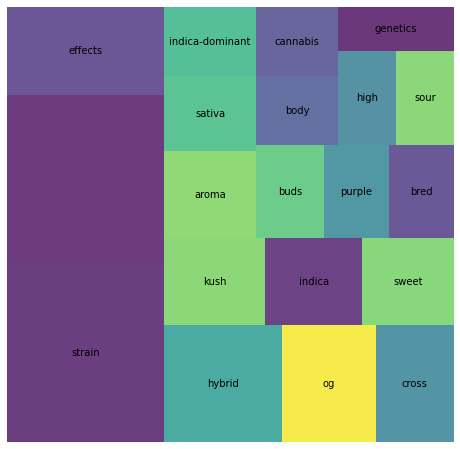

In [193]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

Extending Stop Words

In [194]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [195]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','I', 'og', 'i', 'body', 'it', "it's", 'it.', 'the', 'this'])
STOP_WORDS

{' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'body',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'f

In [196]:
tokens = []
for doc in tokenizer.pipe(df['base_tokens'], batch_size=500):
    
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['spaCy_tokens_v3'] = tokens

In [197]:
wc = count(df['spaCy_tokens_v3'])
print(wc.shape)
wc.head()

(13969, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
21,strain,1572,2276,1.0,0.021297,0.021297,0.668652
78,,1158,2138,2.0,0.020005,0.041302,0.492556
143,effects,968,1121,3.0,0.010489,0.051791,0.411740
17,hybrid,984,1115,4.0,0.010433,0.062224,0.418545
211,cross,716,738,5.0,0.006905,0.069129,0.304551


In [198]:
# To make this comparison more interesting, let's compare
df['hybrid'] = df['Type'].str.contains('hybrid', case=False)
df['indica'] = df['Type'].str.contains('indica', case=False)

(13969, 7) (9578, 7) (6928, 7)


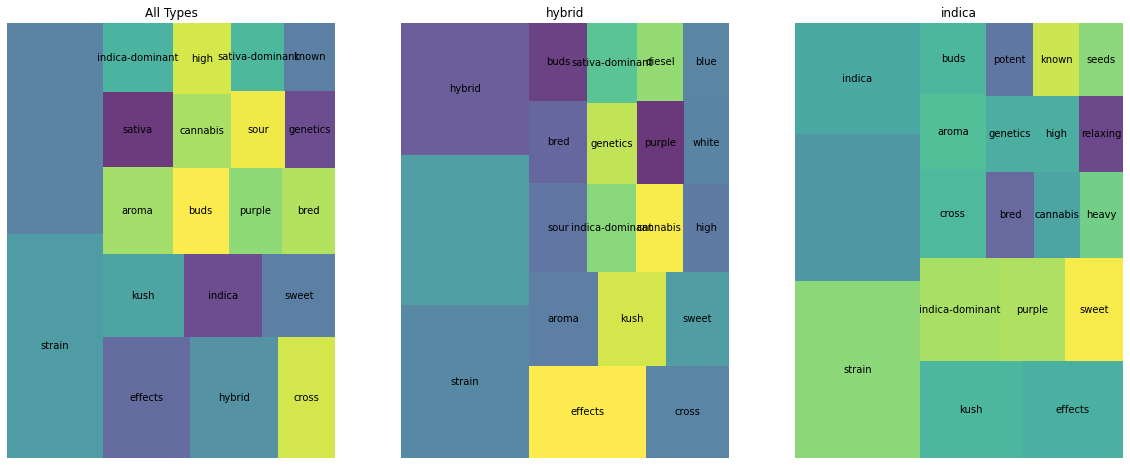

In [200]:
# Use the Function for all reviews, Fire HD 8 only, and Kindle only
wc = count(df['spaCy_tokens_v3'])
wc_hybrid = count(df[df['hybrid'] == 1]['spaCy_tokens_v3'])
wc_indica = count(df[df['indica'] == 1]['spaCy_tokens_v3'])
print(wc.shape, wc_hybrid.shape, wc_indica.shape)

# Get top 20 word occurences for each set of data
wc_top20 = wc[wc['rank'] <= 20]
wc_hybrid_top20 = wc_hybrid[wc_hybrid['rank'] <= 20]
wc_indica_top20 = wc_indica[wc_indica['rank'] <= 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 8))

axes[0].set_title('All Types')
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8, ax=axes[0])
axes[0].axis('off')

axes[1].set_title('hybrid')
squarify.plot(sizes=wc_hybrid_top20['pct_total'], label=wc_hybrid_top20['word'], alpha=.8, ax=axes[1])
axes[1].axis('off')

axes[2].set_title('indica')
squarify.plot(sizes=wc_indica_top20['pct_total'], label=wc_indica_top20['word'], alpha=.8, ax=axes[2])
axes[2].axis('off')
plt.show()

In [201]:
df['Type'].value_counts()

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64

In [202]:
df['Rating'].value_counts()

4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
0.0     71
4.9     59
3.9     29
3.8     23
3.7     16
3.0     13
3.6     11
3.5      9
3.4      5
3.2      3
3.3      3
2.0      2
2.8      1
1.0      1
3.1      1
2.5      1
Name: Rating, dtype: int64

Statistical Trimming

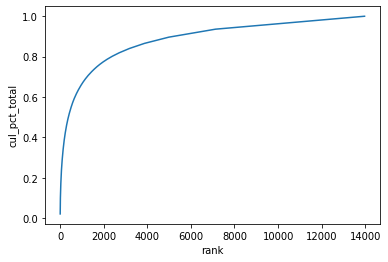

In [203]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [204]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13945,napoli,1,1,13950.0,0.000009,0.999822,0.000425
13950,ucla,1,1,13951.0,0.000009,0.999832,0.000425
13952,transform,1,1,13952.0,0.000009,0.999841,0.000425
13951,flesh-eating,1,1,13953.0,0.000009,0.999850,0.000425
13955,"monster,",1,1,13954.0,0.000009,0.999860,0.000425
13959,fridge,1,1,13955.0,0.000009,0.999869,0.000425
13958,catatonic,1,1,13956.0,0.000009,0.999878,0.000425
13953,them).,1,1,13957.0,0.000009,0.999888,0.000425
13960,rampage,1,1,13958.0,0.000009,0.999897,0.000425
13956,city.,1,1,13959.0,0.000009,0.999906,0.000425


In [205]:
wc['appears_in_pct'].describe()

count    13969.000000
mean         0.002957
std          0.013488
min          0.000425
25%          0.000425
50%          0.000425
75%          0.001701
max          0.668652
Name: appears_in_pct, dtype: float64

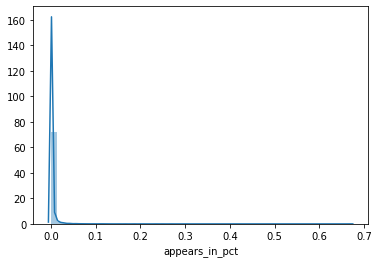

In [206]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

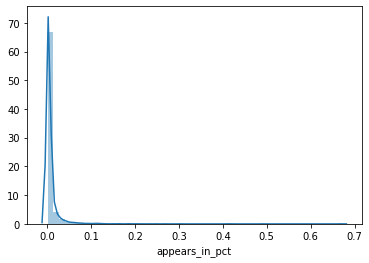

In [207]:
# Tree-Map w/ Words that appear in a least 0.1% of documents. 
wc = wc[wc['appears_in_pct'] >= 0.001]
sns.distplot(wc['appears_in_pct']);

In [208]:
wc.shape

(4559, 7)

In [210]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
12435,power.,3,3,4891.0,0.000028,0.894341,0.001276
12519,user,3,3,4893.0,0.000028,0.894397,0.001276
12828,"fact,",3,3,4899.0,0.000028,0.894565,0.001276
12955,genetix.,3,3,4903.0,0.000028,0.894678,0.001276
13226,terms,3,3,4907.0,0.000028,0.894790,0.001276
